In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

In [35]:
df = pd.read_csv("prepped_churn_data.csv")

df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio
0,1,1,0,Month-to-month,Electronic check,3.396185,29.85,0,3.396185,0.113775
1,2,34,1,One year,Mailed check,4.042174,1889.50,0,0.118887,0.002139
2,3,2,1,Month-to-month,Mailed check,3.986202,108.15,1,1.993101,0.036858
3,4,45,0,One year,Bank transfer (automatic),3.744787,1840.75,0,0.083217,0.002034
4,5,2,1,Month-to-month,Electronic check,4.258446,151.65,1,2.129223,0.028081
...,...,...,...,...,...,...,...,...,...,...
7038,7039,24,1,One year,Mailed check,4.440296,1990.50,0,0.185012,0.002231
7039,7040,72,1,One year,Credit card (automatic),4.636669,7362.90,0,0.064398,0.000630
7040,7041,11,0,Month-to-month,Electronic check,3.387774,346.45,0,0.307979,0.009779
7041,7042,4,1,Month-to-month,Mailed check,4.309456,306.60,1,1.077364,0.014056


## Generate dummies and convert to numeric

In [36]:
payment_method_dummies = pd.get_dummies(df['PaymentMethod'])
contract_dummies = pd.get_dummies(df['Contract'])

df = pd.concat([df, payment_method_dummies, contract_dummies], axis=1)
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,1,1,0,Month-to-month,Electronic check,3.396185,29.85,0,3.396185,0.113775,False,False,True,False,True,False,False
1,2,34,1,One year,Mailed check,4.042174,1889.50,0,0.118887,0.002139,False,False,False,True,False,True,False
2,3,2,1,Month-to-month,Mailed check,3.986202,108.15,1,1.993101,0.036858,False,False,False,True,True,False,False
3,4,45,0,One year,Bank transfer (automatic),3.744787,1840.75,0,0.083217,0.002034,True,False,False,False,False,True,False
4,5,2,1,Month-to-month,Electronic check,4.258446,151.65,1,2.129223,0.028081,False,False,True,False,True,False,False


In [37]:
dummy_columns = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Month-to-month', 'One year', 'Two year']

for column in dummy_columns:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
1048,1049,29,1,One year,Mailed check,2.985682,572.2,0,0.102955,0.005218,0,0,1,1,1,1,0
871,872,57,1,One year,Credit card (automatic),4.580365,5598.0,0,0.080357,0.000818,0,1,1,0,1,1,0
1225,1226,16,0,Month-to-month,Electronic check,3.911023,810.2,1,0.244439,0.004827,0,0,0,0,0,0,0
6120,6121,6,1,Month-to-month,Electronic check,4.085136,357.6,0,0.680856,0.011424,0,0,0,0,0,0,0
5415,5416,18,1,Month-to-month,Electronic check,3.918005,913.3,0,0.217667,0.004290,0,0,0,0,0,0,0


## Drop original cat columns

In [38]:
df.drop(columns=['PaymentMethod', 'Contract', 'customerID'], inplace=True)
df

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,1,0,3.396185,29.85,0,3.396185,0.113775,0,0,0,0,0,0,0
1,34,1,4.042174,1889.50,0,0.118887,0.002139,0,0,1,1,1,1,0
2,2,1,3.986202,108.15,1,1.993101,0.036858,0,0,1,1,0,0,0
3,45,0,3.744787,1840.75,0,0.083217,0.002034,1,0,1,0,1,1,0
4,2,1,4.258446,151.65,1,2.129223,0.028081,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,4.440296,1990.50,0,0.185012,0.002231,0,0,1,1,1,1,0
7039,72,1,4.636669,7362.90,0,0.064398,0.000630,0,1,1,0,1,1,0
7040,11,0,3.387774,346.45,0,0.307979,0.009779,0,0,0,0,0,0,0
7041,4,1,4.309456,306.60,1,1.077364,0.014056,0,0,1,1,0,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tenure                                7043 non-null   int64  
 1   PhoneService                          7043 non-null   int64  
 2   MonthlyCharges                        7043 non-null   float64
 3   TotalCharges                          7043 non-null   float64
 4   Churn                                 7043 non-null   int64  
 5   MonthlyCharges_Tenure_Ratio           7043 non-null   float64
 6   MonthlyCharges_to_TotalCharges_Ratio  7043 non-null   float64
 7   Bank transfer (automatic)             7043 non-null   int64  
 8   Credit card (automatic)               7043 non-null   int64  
 9   Electronic check                      7043 non-null   int64  
 10  Mailed check                          7043 non-null   int64  
 11  Month-to-month   

## Removing outliers

In [40]:
numerical_columns = df.select_dtypes(include=[np.number]).columns

# IQR-based function to remove outliers
def remove_outliers_iqr(data_frame, columns):
    for column in columns:
        Q1 = data_frame[column].quantile(0.25)
        Q3 = data_frame[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data_frame = data_frame[(data_frame[column] >= lower_bound) & (data_frame[column] <= upper_bound)]
    return data_frame

df_clean = remove_outliers_iqr(df, numerical_columns)
df_clean

,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
5,8,1,4.601664,820.50,1,0.575208,0.005608,0,0,0,0,0,0,0
6,22,1,4.489759,1949.40,0,0.204080,0.002303,0,1,1,0,0,0,0
8,28,1,4.652054,3046.05,1,0.166145,0.001527,0,0,0,0,0,0,0
11,16,1,2.941804,326.80,0,0.183863,0.009002,0,1,1,0,1,0,1
13,49,1,4.641502,5036.30,1,0.094725,0.000922,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,38,1,4.241327,2625.25,0,0.111614,0.001616,0,1,1,0,0,0,0
7034,67,1,4.634243,6886.25,1,0.069168,0.000673,0,1,1,0,0,0,0
7035,19,1,4.365643,1495.10,0,0.229771,0.002920,1,0,1,0,0,0,0
7037,72,1,3.051640,1419.40,0,0.042384,0.002150,1,0,1,0,1,0,1


## Data Modelling

In [41]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [42]:
X.sample()

,tenure,PhoneService,MonthlyCharges,TotalCharges,MonthlyCharges_Tenure_Ratio,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
7024,44,1,4.440296,3626.35,0.100916,0.001224,0,1,1,0,0,0,0


## Split data into training and testing sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit model into training data

In [44]:
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [45]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

The frequency of each unique value in the Churn column is calculated. Setting normalize=True returns the relative frequencies proportions instead of raw counts. 
The proportion of the two unique values are as,

    Yes: 0.26537
    No : 0.73463

In [46]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))


1.0
0.7442244224422442


## Performance Evaluation on the training and testing set

In [47]:

train_predictions = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {train_accuracy}')

Training Accuracy: 1.0


In [48]:
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.7442244224422442


## Comparison with NO IR

In [49]:
no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')


No Information Rate: 0.7442148760330578


**Training Accuracy (1.0)**
    
This indicates that the model achieved perfect accuracy on the training data, correctly predicting all churn outcomes.

**Test Accuracy (0.746)**

The model's accuracy on the test data is approximately 74.6%, meaning it correctly predicted churn outcomes for about 74.6% of the customers in the test set. It suggests that the model is moderately effective in predicting churn based on the given features.

**No-Information Rate (0.744)**

This rate serves as a baseline metric, indicating the accuracy achieved by always predicting the majority class (i.e., No churn). 

## Confusion matrix

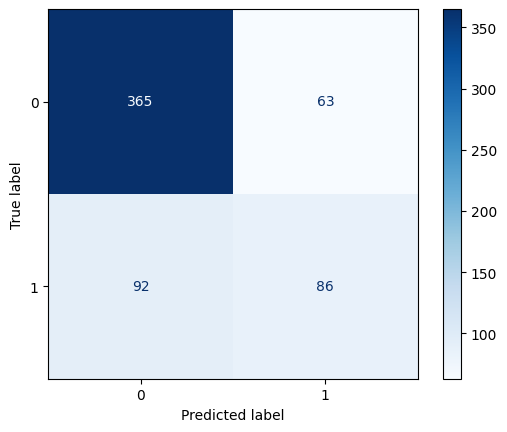

In [50]:
cm = confusion_matrix(y_test, test_predictions, labels=rf_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### True negatives (TN)

The model correctly predicted 369 instances where the true label is 0 (no churn). This signifies the number of customers who were correctly identified as not churning.

#### False negatives (FN)

The model incorrectly predicted no churn when the true label is 1 (churn) in 95 instances. These are customers who churned despite the model predicting otherwise.

#### True positives (TP)

The model correctly predicted 83 instances where the true label is 1 (churn). This signifies the number of customers who were correctly identified as churning. These are customers who actually churned, and the model successfully flagged them for attention or intervention.

#### False positives (FP)

The model incorrectly predicted 1 (churn) when the true label is 0 (no churn) in 59 instances. This signifies the number of customers who were incorrectly identified as churning, leading to unnecessary intervention or resources being allocated to customers who were not at risk of churning.

## Tuning the model

In [51]:
rf_model.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.4 , 0.6 ],
       [0.79, 0.21],
       ...,
       [0.76, 0.24],
       [0.7 , 0.3 ],
       [0.73, 0.27]])

## Hyperparameter grid

In [52]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data with grid search
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

## Best hyperparameters

In [53]:
print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)


In [55]:
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.7656765676567657


## Comparing with No information rate

In [56]:
no_info_rate = max(y_train.value_counts(normalize=True))
print(f'No Information Rate: {no_info_rate}')

No Information Rate: 0.7442148760330578


## Feature Importances

In [57]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.11909002, 0.        , 0.21096741, 0.16718326, 0.20039006,
       0.16038264, 0.00860197, 0.00808315, 0.02888944, 0.        ,
       0.05754082, 0.        , 0.03887124])

The values represent the proportion of impurity reduction that each feature contributes to the model.

Higher values indicate features that are more influential in making predictions.

## Display feature importances

In [58]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df.head(5)


,Feature,Importance
0,tenure,0.119090
1,PhoneService,0.000000
2,MonthlyCharges,0.210967
3,TotalCharges,0.167183
4,MonthlyCharges_Tenure_Ratio,0.200390


## Sort df by Importance

In [59]:

importance_df = importance_df.sort_values(by='Importance', ascending=False)

## Bar cahrt to visualize feature importances

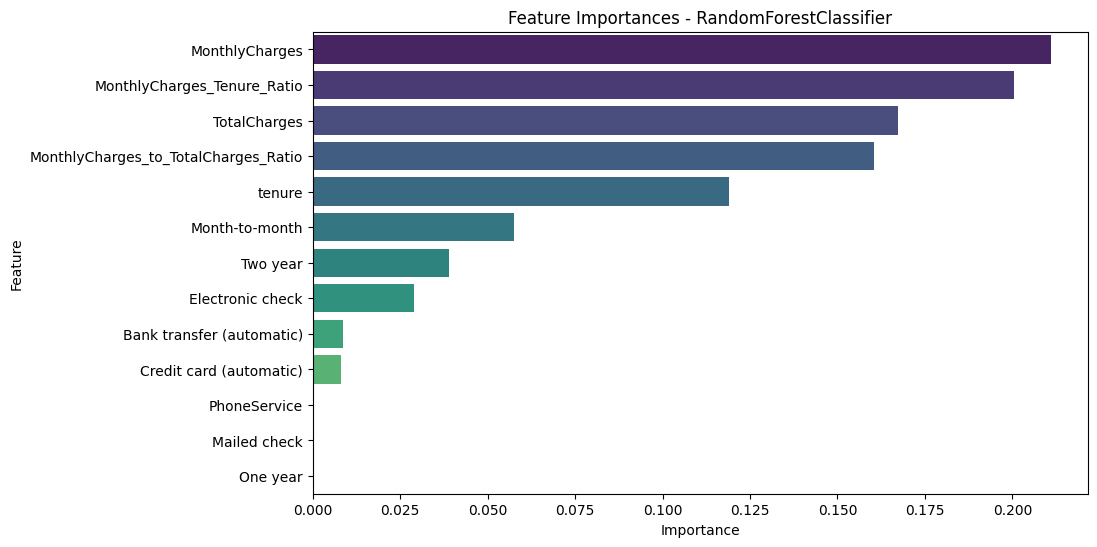

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Feature Importances - RandomForestClassifier')
plt.show()

Features with taller bars like MonthlyCharges, MonthlyCharges_tenure_ratio e.t.c., have higher importances and contribute more to the model's decision-making.

## ROC Curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 800x800 with 0 Axes>

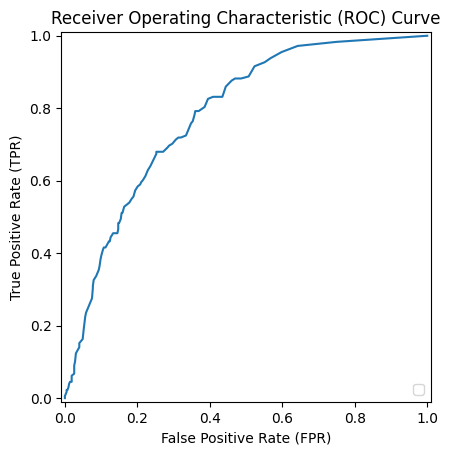

In [61]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Make predictions on the test set
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()


The ROC curve is a graphical representation of the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across different threshold values. 

**True Positive Rate (TPR) / Sensitivity** 

This is the y-axis. It represents the proportion of actual positive instances (churn cases) correctly predicted by the model.

**False Positive Rate (FPR) / 1 - Specificity**

This is the x-axis. It represents the proportion of actual negative instances incorrectly predicted as positive by the model.

**Interpretation**

**Curve Shape**

The curve is generally upward-sloping, indicating that as the true positive rate increases, there is a corresponding increase in the false positive rate.


**Thresholds**

The curve represents different classification thresholds for the model. It shows how the TPR and FPR change as the decision threshold is varied.

In [62]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       428
           1       0.58      0.48      0.53       178

    accuracy                           0.74       606
   macro avg       0.69      0.67      0.68       606
weighted avg       0.73      0.74      0.74       606



**Classification Report** 

Precision: Precision measures the proportion of true positive predictions among all positive predictions. A precision of 0.58 for class 1 suggests that among all instances predicted as churn (positive cases), approximately 58% are actually churned customers.

Recall: Recall, also known as sensitivity, measures the proportion of actual positive cases that were correctly identified by the model. A recall of 0.48 for class 1 indicates that the model correctly identified approximately 48% of all churned customers.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. A higher F1-score indicates better balance between precision and recall.

Accuracy: Accuracy represents the overall correctness of the model's predictions, regardless of class. An accuracy of `0.74` indicates that approximately 74% of all predictions made by the model on the test set are correct.

## Deployment

## Microservice Architecture

Deploying the model as a microservice within a microservices architecture offers several benefits. 
It enables the model to be containerized, facilitating independent deployment and scalability. This approach aligns with the principles of modularity and flexibility promoted by microservices architecture, allowing the model to seamlessly integrate into the existing customer management system without disrupting other functionalities. 

Additionally, containerization provides isolation, ensuring that any changes or updates to the model can be made independently of the larger system, enhancing maintainability and reliability.

## Application

It can be deployed in the business to automate the identification of customers at a high risk of churning. 

By integrating it into the business's customer management system, it can provide real-time predictions. 

The business can use these predictions to trigger targeted and personalized interventions, such as special offers, proactive customer support, or tailored communication. This approach enables the business to address potential churners, optimize resource allocation, and foster stronger customer retention strategies.